<a href="https://colab.research.google.com/github/alokrep/fires/blob/main/main/src/fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/MyDrive/Neal/DataScience/fires'
os.chdir(filepath)

In [4]:
# This took 132 seconds
#gen = pd.read_csv("Firedata.csv", chunksize=1000000)
#fires = pd.concat((x.query('FPA_ID.notna()') for x in gen), ignore_index=True)

In [5]:
#fires = fires.reset_index()
#fires['index'] = fires['index']+1
#fires['OBJECTID'] = fires['index']
#del fires['index']
#good = fires[np.isnan(fires['Shape'])]
#bad = fires.dropna(subset=["Shape"])
#reorder = [bad.columns[0]] + [bad.columns[-1]] + list(bad.columns[1:-1])
#bad = bad[reorder]
#bad.columns = fires.columns
#fires = pd.concat([good, bad])
#fires.to_csv("fires_cleaned1.csv", index=False)

In [6]:
fires = pd.read_csv("fires_cleaned.csv")

<ipython-input-6-23846ac61f4d>:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,25,26,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  fires = pd.read_csv("fires_cleaned.csv")


## County Demographics

In [7]:
counties = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/county_demographics/county_demographics.csv")

In [8]:
vtype = np.vectorize(type)

In [9]:
cfires = fires.dropna(subset=['FIPS_NAME'])

In [10]:
len(np.unique(cfires['FIPS_NAME']))

1805

In [11]:
len(np.unique(counties['County']))

1874

In [12]:
fire_counties = fires.groupby(by=['FIPS_NAME', 'STATE'], as_index=False).agg({'OBJECTID':"count"})

In [13]:
len(fire_counties)

2957

In [14]:
len(counties)

3139

In [15]:
fire_counties.merge(counties, left_on=["FIPS_NAME", "STATE"], right_on=["County", "State"])

,FIPS_NAME,STATE,OBJECTID,County,State,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,Abbeville County,SC,968,Abbeville County,SC,22.4,19.8,4.7,15.6,81.7,...,51.8,12507,91371,1450,543,689,317,1080,187,1211
1,Acadia Parish,LA,10,Acadia Parish,LA,15.8,25.8,6.9,13.3,79.0,...,94.3,52706,602739,4664,1516,2629,705,3734,388,4007
2,Accomack County,VA,172,Accomack County,VA,24.6,20.7,5.6,19.5,81.5,...,73.8,53568,348195,2997,802,1716,335,2560,212,2536
3,Ada County,ID,2315,Ada County,ID,14.9,23.2,5.6,38.5,95.2,...,372.8,763099,5766679,41789,14661,19409,3099,36701,3803,35132
4,Adair County,IA,62,Adair County,IA,23.0,21.8,5.6,18.5,94.2,...,13.5,-1,63002,914,304,499,0,861,185,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,Yuma County,AZ,672,Yuma County,AZ,19.3,25.1,7.1,15.0,73.3,...,35.5,307540,1995974,10846,4298,4529,5749,4476,839,9265
2931,Yuma County,CO,235,Yuma County,CO,18.7,27.4,7.5,21.8,88.6,...,4.2,8501,125565,1492,391,797,45,1350,66,1278
2932,Zapata County,TX,242,Zapata County,TX,13.2,33.1,8.6,11.6,61.9,...,14.0,-1,75681,1964,818,1003,1680,235,181,1738
2933,Zavala County,TX,228,Zavala County,TX,14.6,28.4,7.2,10.9,66.9,...,9.0,8808,45596,1232,486,674,1062,159,42,1178


In [16]:
big = cfires.merge(counties, left_on=["FIPS_NAME", "STATE"], right_on=["County", "State"])

In [17]:
big

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,Population.Population per Square Mile,Sales.Accommodation and Food Services Sales,Sales.Retail Sales,Employment.Firms.Total,Employment.Firms.Women-Owned,Employment.Firms.Men-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned
0,1,1.0,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,7.8,-1,139325,2039,560,942,198,1742,218,1653
1,399,406.0,FS-1419737,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,7.8,-1,139325,2039,560,942,198,1742,218,1653
2,1315,1329.0,FS-1421758,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,7.8,-1,139325,2039,560,942,198,1742,218,1653
3,1318,1332.0,FS-1421790,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,7.8,-1,139325,2039,560,942,198,1742,218,1653
4,1416,1430.0,FS-1421999,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,7.8,-1,139325,2039,560,942,198,1742,218,1653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636422,2300869,400649395.0,IRW-2020-INIDP-200040,INTERAGCY,IA-IRWIN,NPS,USINIDP,Indiana Dunes National Lakeshore,INIDP,Indiana Dunes National Lakeshore,...,393.0,270608,2035375,10999,3866,5299,896,9601,886,9489
1636423,2302431,400651087.0,IRW-2020-VAPEP-200001,INTERAGCY,IA-IRWIN,NPS,USVAPEP,Petersburg National Battlefield,VAPEP,Petersburg National Battlefield,...,2197.9,33506,164780,1238,511,616,452,715,141,1018
1636424,2302447,400651114.0,IRW-2020-MDCOP-MDCOP-0002,INTERAGCY,IA-IRWIN,NPS,USMDCOP,Chesapeake & Ohio Canal National Historical Park,MDCOP,Chesapeake & Ohio Canal National Historical Park,...,9856.6,5101602,4439933,63408,27064,30237,29983,29521,5070,54217
1636425,663156,725673.0,SFO-2007VADFVA0266-HAM200807,NONFED,ST-NASF,ST/C&L,USVAVAS,Virginia Department of Forestry,VAVAS,Virginia Department of Forestry,...,2673.2,249039,1512476,8058,3473,3626,3865,3694,1181,6139


## Classifying the fire size categories

In [18]:
fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [19]:
fires['FIRE_SIZE'] = fires['FIRE_SIZE'].astype(float)

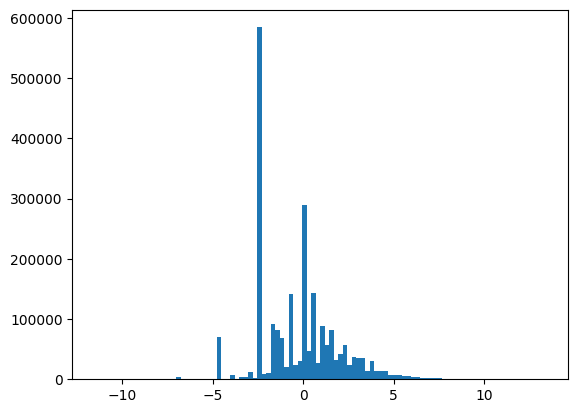

In [20]:
plt.hist(np.log(fires['FIRE_SIZE']), bins=100);

In [21]:
fires['LATITUDE'] = fires['LATITUDE'].astype(float)
fires['LONGITUDE'] = fires['LONGITUDE'].astype(float)

fires['DISCOVERY_TIME'] = fires['DISCOVERY_TIME'].astype(float)
fires['CONT_TIME'] = fires['CONT_TIME'].astype(float)

In [22]:
fires1 = fires.dropna(subset=['DISCOVERY_TIME', 'CONT_TIME'])

In [23]:
size_classes = fires1.groupby(by="FIRE_SIZE_CLASS", as_index=False).agg({"OBJECTID":"count"})

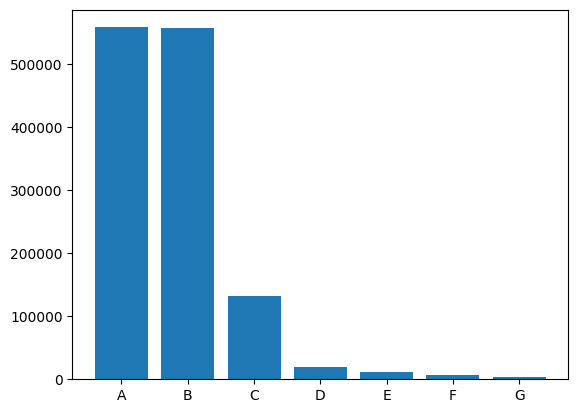

In [24]:
plt.bar(x=size_classes['FIRE_SIZE_CLASS'], height=size_classes['OBJECTID']);

In [25]:
size_classes

,FIRE_SIZE_CLASS,OBJECTID
0,A,558599
1,B,557073
2,C,132590
3,D,20126
4,E,11268
5,F,7045
6,G,3871


In [26]:
# majority class baseline
558599 / np.sum(size_classes['OBJECTID'])

0.4328305588529737

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
fires['label'] = le.fit_transform(fires['FIRE_SIZE_CLASS'])

In [29]:
causes = pd.get_dummies(fires['NWCG_GENERAL_CAUSE']).columns

In [30]:
fires = pd.concat([fires, pd.get_dummies(fires['NWCG_GENERAL_CAUSE'])], axis=1)

In [31]:
data_train, data_test = train_test_split(fires1, test_size=0.2, random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming data_train is your training dataset
# X_train contains the features, and y_train is the target variable

# Initialize KNN classifier with 5 neighbors
neigh = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
neigh = neigh.fit(data_train[['DISCOVERY_TIME', 'CONT_TIME']], data_train["label"])

KeyError: ignored

In [ ]:
y_pred = neigh.predict(data_test[['DISCOVERY_TIME', 'CONT_TIME']])

In [ ]:
accuracy_score(y_pred,data_test["label"])

In [ ]:
 fit model no training data
model = XGBClassifier()
model = model.fit(data_train[['DISCOVERY_TIME', 'CONT_TIME']], data_train["label"])

In [ ]:
y_pred = model.predict(data_test[['DISCOVERY_TIME', 'CONT_TIME']])

In [ ]:
accuracy_score(y_pred,data_test["label"])

In [ ]:
 fit model no training data
rf = RandomForestClassifier()
rf = rf.fit(data_train[["LONGITUDE", "LATITUDE"]], data_train["label"])

In [ ]:
y_pred = rf.predict(data_test[["LONGITUDE", "LATITUDE"]])

In [ ]:
accuracy_score(y_pred,data_test["label"])

In [ ]:
plt.figure(figsize=(40,20))
plt.scatter(y=fires["LATITUDE"], x=fires["LONGITUDE"], c = np.log(fires["FIRE_SIZE"]));

In [ ]:
fires.columns

## Regressing the fire size

In [ ]:
def minmax_scale(var):
  min_var = np.min(var)
  max_var = np.max(var)
  range_var = max_var - min_var
  return (var - min_var) / range_var

In [ ]:
def std_scale(var):
  mean_var = np.mean(var)
  std_var = np.std(var)
  return (var - mean_var) / std_var

In [ ]:
fires_with_sizes = big.dropna(subset = ["FIRE_SIZE"])

In [ ]:
plt.hist(fires_with_sizes["FIRE_SIZE"], bins = 100);

In [ ]:
fires_with_sizes["FIRE_SIZE"] = np.log(fires_with_sizes["FIRE_SIZE"])

In [ ]:
plt.hist(fires_with_sizes["FIRE_SIZE"], bins = 100);

In [ ]:
#hawaii = fires_with_sizes[np.logical_and(fires_with_sizes['LATITUDE']<30, fires_with_sizes['LONGITUDE']<-140)]
#pr = fires_with_sizes[np.logical_and(fires_with_sizes['LATITUDE']<22, fires_with_sizes['LONGITUDE']>-70)]
#passage = fires_with_sizes[np.logical_and(fires_with_sizes['LATITUDE']>50,np.logical_and(fires_with_sizes['LATITUDE']<61, fires_with_sizes['LONGITUDE']>-138))]
#alaska = fires_with_sizes[np.logical_and(fires_with_sizes['LATITUDE']>50, fires_with_sizes['LONGITUDE']<=-138)]

In [ ]:
def region(lat, lng):
  if lat < 30 and lng < -140: return "Hawaii"
  if lat < 22 and lng > -70: return "PuertoRico"
  if lat > 50 and lat < 61 and lng > -138: return "NWPassage"
  if lat > 50 and lng <= -138: return "Alaska"
  return "Continental"

In [ ]:
fires_with_sizes['Region'] = fires_with_sizes.apply(lambda x: region(x['LATITUDE'], x['LONGITUDE']), axis=1)

In [ ]:
fires_with_sizes = fires_with_sizes[fires_with_sizes['Region']=='Continental']

In [ ]:
fires_with_sizes["FIRE_SIZE"] = minmax_scale(fires_with_sizes["FIRE_SIZE"])*100
fires_with_sizes["LATITUDE"] = minmax_scale(fires_with_sizes["LATITUDE"])
fires_with_sizes["LONGITUDE"] = minmax_scale(fires_with_sizes["LONGITUDE"])

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [ ]:
def coefplot(results, subject):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    params = results.params
    errors = results.conf_int(0.05).iloc[:, 0]
    errors = params - errors

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['Intercept'])

    # Sort values by coef ascending
    #coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables
    display(coef_df)

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='barh',
                 ax=ax, color='none', fontsize=22,
                 ecolor='steelblue',capsize=0,
                 xerr='errors', legend=False)

    # Set title & labels
    plt.title('Coefficients for '+subject+' model w/ 95% CIs',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)

    # Coefficients
    ax.scatter(y=np.arange(coef_df.shape[0]),
               marker='o', s=80,
               x=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(subject+"_coefplot.pdf")

    return None

In [ ]:
def metrics(mod):
  return np.round(mod.aic), np.round(mod.llf), np.round(mod.rsquared, 3), np.round(np.mean(np.abs(fires_with_sizes['FIRE_SIZE'] - mod.fittedvalues)), 3), np.round(mod.fvalue)

In [ ]:
mod1 = smf.ols(formula='FIRE_SIZE ~ C(Region) + LATITUDE + LONGITUDE', data=fires_with_sizes)

In [ ]:
mod1 = smf.ols(formula='FIRE_SIZE ~ LATITUDE + LONGITUDE', data=fires_with_sizes)

In [ ]:
mod1 = mod1.fit()

In [ ]:
coefplot(mod1, "FIRE_SIZE")

In [ ]:
metrics(mod1)

In [ ]:
metrics(mod1)

In [ ]:
metrics(mod1)

In [ ]:
metrics(mod1)

In [ ]:
plt.figure(figsize=(40,20))
plt.scatter(y=fires_with_sizes["LATITUDE"], x=fires_with_sizes["LONGITUDE"], c = mod1.fittedvalues);

In [ ]:
plt.figure(figsize=(40,20))
plt.scatter(y=fires_with_sizes["LATITUDE"], x=fires_with_sizes["LONGITUDE"], c = mod1.fittedvalues);

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(mod1.fittedvalues, fires_with_sizes["FIRE_SIZE"]);

In [ ]:
fires_with_sizes.columns

In [ ]:
fires_with_sizes = fires_with_sizes.rename(columns={"Miscellaneous.Land Area":"county_area", "Population.2020 Population":"county_pop", 'Income.Per Capita Income':"Income"})

In [ ]:
plt.hist(np.log(fires_with_sizes['county_area']), bins=100);

In [ ]:
plt.hist(np.log(fires_with_sizes['county_pop']), bins=100);

In [ ]:
plt.hist(np.log(fires_with_sizes['Income']), bins=100);

In [ ]:
fires_with_sizes["county_area"] = std_scale(np.log(fires_with_sizes["county_area"]))
fires_with_sizes["county_pop"] = std_scale(np.log(fires_with_sizes["county_pop"]))
fires_with_sizes["Income"] = std_scale(np.log(fires_with_sizes["Income"]))

In [ ]:
mod2 = smf.ols(formula='FIRE_SIZE ~ LATITUDE + LONGITUDE + county_area + county_pop', data=fires_with_sizes)

In [ ]:
mod2 = mod2.fit()

In [ ]:
mod2.summary()

In [ ]:
def make_coefdf(mod):
    params = mod.params[:5]
    errors = mod.conf_int(0.05).iloc[:5, 0]
    errors = params - errors
    return pd.DataFrame({"coef":params,
                         "errors":errors})

In [ ]:
make_coefdf(mod2)

In [ ]:
mod3 = smf.ols(formula='FIRE_SIZE ~ LATITUDE + LONGITUDE + county_area * county_pop', data=fires_with_sizes)

In [ ]:
mod3 = mod3.fit()

In [ ]:
coefplot(mod3, "FIRE_SIZE")

In [ ]:
mod4 = smf.ols(formula='FIRE_SIZE ~ LATITUDE + LONGITUDE + county_area * county_pop * Income', data=fires_with_sizes)

In [ ]:
mod4 = mod4.fit()

In [ ]:
coefplot(mod4, "FIRE_SIZE")

In [ ]:
metrics(mod1)

In [ ]:
metrics(mod2)

In [ ]:
metrics(mod3)

In [ ]:
metrics(mod4)

### Stuff for JEI Paper

1. Use everything up to this point to make the claim that we are modeling the fire sizes in a good way.
2. Find the country-wide residuals based on the best model.

In [ ]:
plt.figure(figsize=(40,20))
plt.scatter(y=fires_with_sizes["LATITUDE"], x=fires_with_sizes["LONGITUDE"], c = mod4.resid, alpha=0.3);

3. Restrict the view to just California, Oregon, and Washington. (You could alternatively choose the southeast based on whatever you think your dad's connection will like better.)

In [ ]:
# Make sure that these are spelled right and abbreviated the same way in the data
california = fires_with_sizes[fires_with_sizes['STATE']=='CA']
oregon = fires_with_sizes[fires_with_sizes['STATE']=='OR']
washington = fires_with_sizes[fires_with_sizes['STATE']=='WA']

4. Perform 2 sample t-tests on the residuals

In [ ]:
import scipy.stats as stats

In [ ]:
ca_pred = california['FIRE_SIZE'] - mod4.predict(california)
or_pred = oregon['FIRE_SIZE']     - mod4.predict(oregon)
wa_pred = washington['FIRE_SIZE'] - mod4.predict(washington)

In [ ]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=ca_pred, b=or_pred, equal_var=True)

In [ ]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=ca_pred, b=wa_pred, equal_var=True)

In [ ]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=wa_pred, b=or_pred, equal_var=True)

Null hypothesis: The reported fire sizes among California, Oregon, and Washington are NOT significantly different after accounting for county area, population, and income.

Alternative hypothesis: The reported fire sizes among California, Oregon, and Washington are significantly different even after accounting for county area, population, and income.

Test statistic: two sample t-value

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming ca_pred, or_pred, wa_pred, and nm_pred are the arrays of residuals for each state
# Replace these with the actual variables from your code

# Perform the two sample t-test with equal variances
t_stat_ca_or, p_value_ca_or = stats.ttest_ind(a=ca_pred, b=or_pred, equal_var=True)

# Perform the two sample t-test with equal variances
t_stat_ca_wa, p_value_ca_wa = stats.ttest_ind(a=ca_pred, b=wa_pred, equal_var=True)

# Perform the two sample t-test with equal variances
t_stat_wa_or, p_value_wa_or = stats.ttest_ind(a=wa_pred, b=or_pred, equal_var=True)

# Perform the two sample t-test with equal variances
t_stat_ca_nm, p_value_ca_nm = stats.ttest_ind(a=ca_pred, b=nm_pred, equal_var=True)

# Perform the two sample t-test with equal variances
t_stat_wa_nm, p_value_wa_nm = stats.ttest_ind(a=wa_pred, b=nm_pred, equal_var=True)

# Perform the two sample t-test with equal variances
t_stat_or_nm, p_value_or_nm = stats.ttest_ind(a=or_pred, b=nm_pred, equal_var=True)

# Print the results
print("California vs. Oregon: t-statistic =", t_stat_ca_or, "p-value =", p_value_ca_or)
print("California vs. Washington: t-statistic =", t_stat_ca_wa, "p-value =", p_value_ca_wa)
print("Washington vs. Oregon: t-statistic =", t_stat_wa_or, "p-value =", p_value_wa_or)
print("California vs. New Mexico: t-statistic =", t_stat_ca_nm, "p-value =", p_value_ca_nm)
print("Washington vs. New Mexico: t-statistic =", t_stat_wa_nm, "p-value =", p_value_wa_nm)
print("Oregon vs. New Mexico: t-statistic =", t_stat_or_nm, "p-value =", p_value_or_nm)

### Old Stuff

In [ ]:
#AIC LLF R^2 MAE F-STAT
#V   ^   ^   V   ^

In [ ]:
plt.figure(figsize=(40,20))
plt.scatter(y=fires_with_sizes["LATITUDE"], x=fires_with_sizes["LONGITUDE"], c = mod2.resid);

In [ ]:
plt.figure(figsize=(40,20))
plt.scatter(y=fires_with_sizes["LATITUDE"], x=fires_with_sizes["LONGITUDE"], c = mod3.resid, alpha=0.3);

In [ ]:
fires_with_sizes['pred'] = mod1.fittedvalues

In [ ]:
pr = fires_with_sizes[fires_with_sizes['pred']>50]

In [ ]:
pr[['LATITUDE', 'LONGITUDE']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fires_with_sizes[["LONGITUDE","LATITUDE"]], fires_with_sizes["FIRE_SIZE"], test_size = 0.2, random_state=35)

In [ ]:
rfr_model = RandomForestRegressor(random_state=1, max_depth=10)
rfr_model.fit(X_train,y_train)

In [ ]:
y_pred = rfr_model.predict(X_test)

In [ ]:
np.round(np.mean(np.abs(y_test - y_pred)), 3)

In [ ]:
len(rfr_model.estimators_)

In [ ]:
resid = y_test - y_pred

In [ ]:
sigma = np.std(resid)  * np.sqrt((len(y_test)-1000)/len(y_test))